In [20]:
import os
import pandas as pd

# 현재 경로 확인
os.getcwd()

'C:\\Users\\USER\\book'

## EDA

In [21]:
# 데이터 불러오기
book = pd.read_csv('data/train.csv')
print(book.head())

             ID     User-ID      Book-ID  Book-Rating   Age  \
0  TRAIN_000000  USER_00000  BOOK_044368            8  23.0   
1  TRAIN_000001  USER_00000  BOOK_081205            8  23.0   
2  TRAIN_000002  USER_00000  BOOK_086781            0  23.0   
3  TRAIN_000003  USER_00000  BOOK_098622            0  23.0   
4  TRAIN_000004  USER_00000  BOOK_180810            8  23.0   

                           Location                          Book-Title  \
0  sackville, new brunswick, canada                          Road Taken   
1  sackville, new brunswick, canada   Macbeth (New Penguin Shakespeare)   
2  sackville, new brunswick, canada  Waverley (Penguin English Library)   
3  sackville, new brunswick, canada             Mother Earth Father Sky   
4  sackville, new brunswick, canada                   She Who Remembers   

           Book-Author  Year-Of-Publication      Publisher  
0           Rona Jaffe               2001.0           Mira  
1  William Shakespeare               1981.0  Pen

In [22]:
# Book-Rating, Age, Year-Of-Publication > 범주형 변환 필요
# Location은 ,를 기준으로 분리 (도, 주, 나라)

In [23]:
book.info()
# 총 871,393개 raw
# count만 봤을 때는 결측치가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [24]:
# 데이터 설명에 Year-Of-Publication 값이 -1이면 결측치라고 명시되어 있으므로 -1인 값을 가지는지 확인
print(len(book.loc[book['Year-Of-Publication'] == -1]))
#print(book.loc[book['Year-Of-Publication'] == -1])

# Year-Of-Publication(도서 출판 년도)의 결측치의 개수는 총 11,515개
# 전체 데이터 개수 871,393개 중 결측치가 11,515개 (전체 데이터의 1.3% 수준이라 제거해도 된다고 판단됨)

11515


In [25]:
# Year-Of-Publication(도서 출판 년도)의 결측치 총 11,515개 제거
book = book[book['Year-Of-Publication'] != -1]

0


In [26]:
# 기술 통계량 확인
print(book.describe())

# Book-Rating 평균 2.8점 / 0점~10점
# Age 평균 36.8세 / 0세~244세 -> 데이터 이상(유니크 값 확인해보기)
# 결측치 제거 후 총 개수 859,878

         Book-Rating            Age  Year-Of-Publication
count  859878.000000  859878.000000        859878.000000
mean        2.816737      36.816466          1995.283170
std         3.846019      12.060493             7.375755
min         0.000000       0.000000          1376.000000
25%         0.000000      31.000000          1992.000000
50%         0.000000      35.000000          1997.000000
75%         7.000000      41.000000          2001.000000
max        10.000000     244.000000          2021.000000


In [27]:
# Age 유니크값 확인

print(book['Age'].unique())

[ 23.  35.  24.  39.  37.  47.  48.  20.  31.  46.  49.  58.  68.  26.
  32.  17.  34.  56.  36.  15.  53.  18.  40.  27.  25.  69.  43.  45.
  33.  61.  52.  29.  30.  14.  66.  13.  62.  19.   0.  83.  57.  50.
  28.  63.  55.  51.  42.  38.  41.  54.  22.  65.  60.  70.  64.  21.
 103.  44.  16.  73.  93.   4.  75.  71.  11.  67.  10.  59.  79. 138.
  74.   3.  76.   1.   5.  12.   6.  81.  78. 141.  85.  72.  80.  77.
 101.  90. 148.   8. 104. 168.   9.   2. 108. 209. 114. 219. 136. 147.
 100.   7.  96. 151. 239. 229. 109.  86.  92. 157. 228. 237. 107.  84.
 204. 127.  82.  97.  89. 220. 226. 116. 124. 199. 152.  98. 244. 128.
 201.  99. 140. 146. 118. 223. 212. 123. 200.]


In [45]:
# 5이하, 100이상은 이상치로 판단하고 행 삭제하기
book = book[(book['Age'] > 5) & (book['Age'] < 100)]

In [46]:
# Age 유니크값 다시 확인

print(book['Age'].unique())

[23. 35. 24. 39. 37. 47. 48. 20. 31. 46. 49. 58. 68. 26. 32. 17. 34. 56.
 36. 15. 53. 18. 40. 27. 25. 69. 43. 45. 33. 61. 52. 29. 30. 14. 66. 13.
 62. 19. 83. 57. 50. 28. 63. 55. 51. 42. 38. 41. 54. 22. 65. 60. 70. 64.
 21. 44. 16. 73. 93. 75. 71. 11. 67. 10. 59. 79. 74. 76. 12.  6. 81. 78.
 85. 72. 80. 77. 90.  8.  9.  7. 96. 86. 92. 84. 82. 97. 89. 98. 99.]


In [47]:
# 기술 통계량 다시 확인 - 결측치 제거 후 총 개수 : 855,690개
print(book.describe())

         Book-Rating            Age  Year-Of-Publication
count  855690.000000  855690.000000        855690.000000
mean        2.817441      36.571363          1995.282182
std         3.846441      10.342878             7.375436
min         0.000000       6.000000          1376.000000
25%         0.000000      31.000000          1992.000000
50%         0.000000      35.000000          1997.000000
75%         7.000000      41.000000          2001.000000
max        10.000000      99.000000          2021.000000


In [49]:
print(book['Age'].value_counts())
# 35세가 248,313건으로 제일 많음(결측치 제거 후 총 개수 855,690개 중 29.0% 차지)

35.0    248313
33.0     27058
29.0     25105
30.0     22774
31.0     22190
         ...  
96.0         8
99.0         4
89.0         2
86.0         1
98.0         1
Name: Age, Length: 89, dtype: int64


array([[<Axes: title={'center': 'Book-Rating'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Year-Of-Publication'}>, <Axes: >]],
      dtype=object)

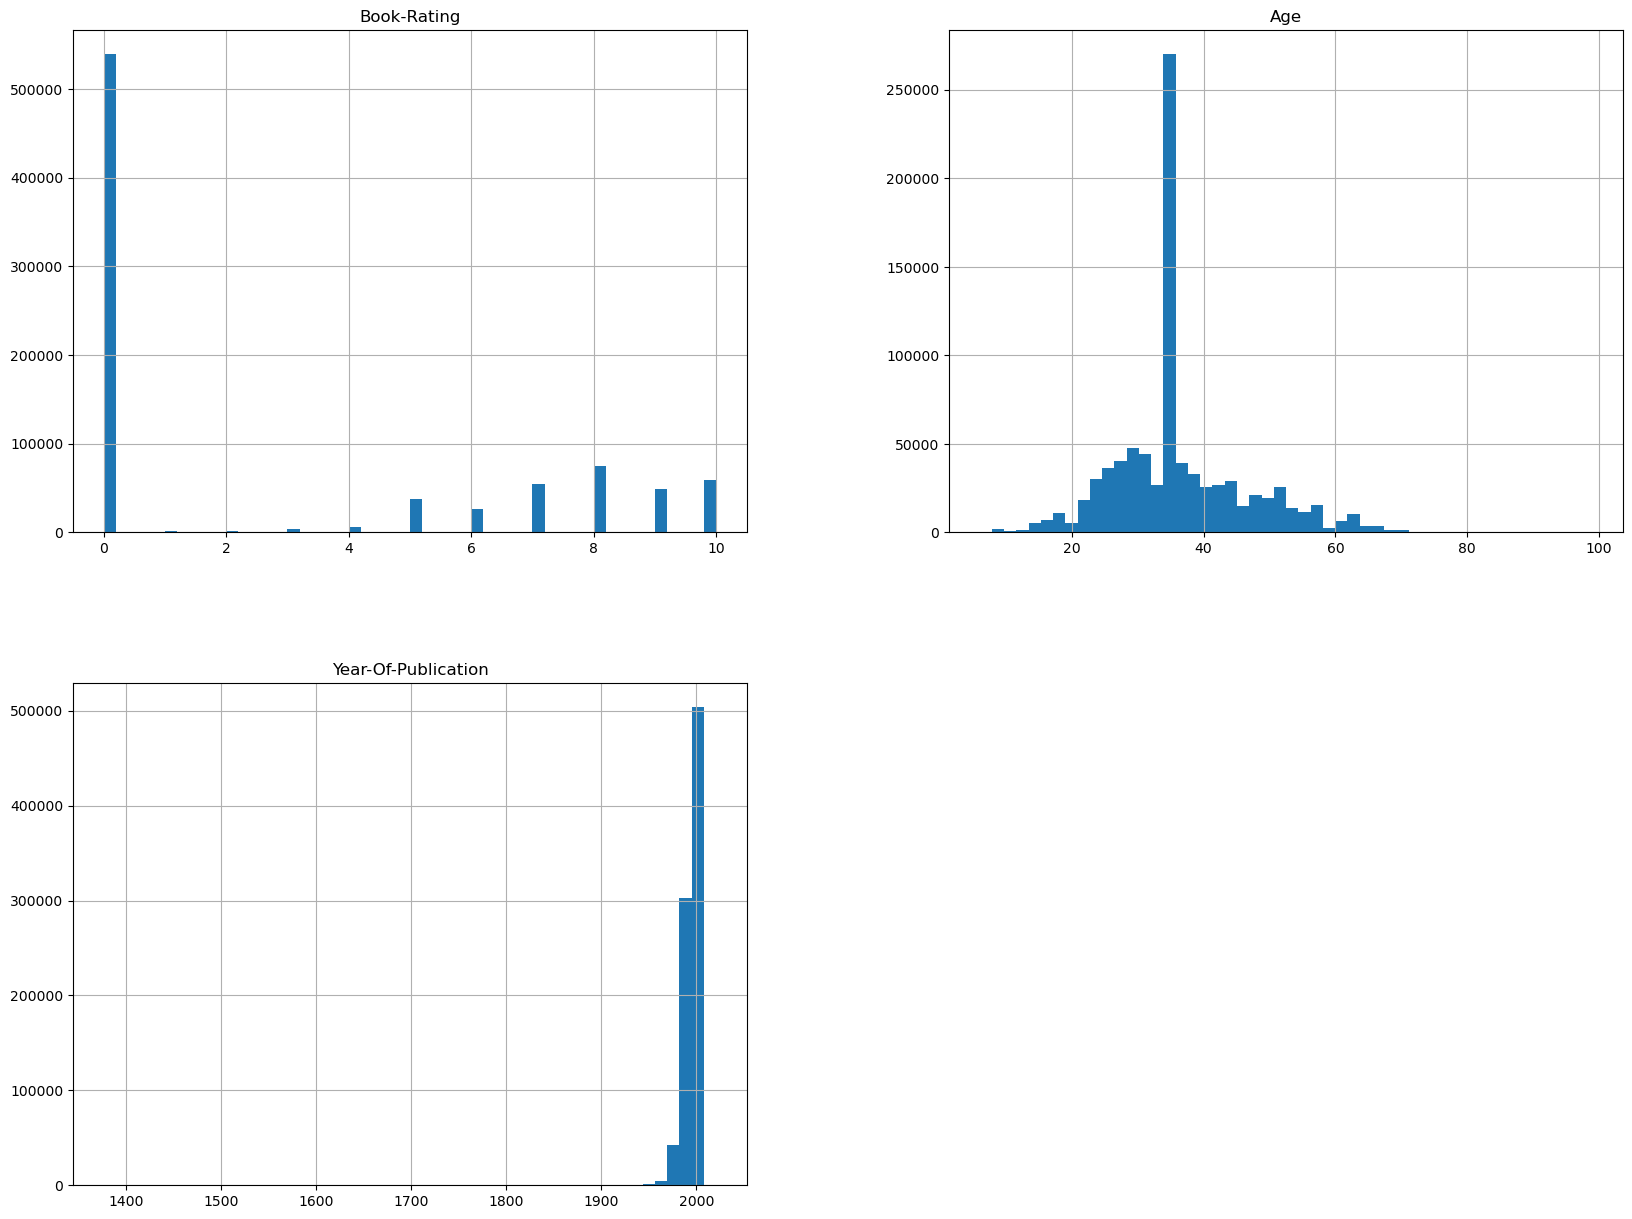

In [50]:
book.hist(bins=50, figsize=(20, 15))